In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
# or, if 'latin1' doesn't work:
# df = pd.read_csv('/content/vaibhav.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
print("\n--- Info ---")
df.info()
print("\n--- Missing values ---")
print(df.isnull().sum())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64

In [5]:
# STEP 2: Check Data Structure & Missing Values
print("\n--- Info ---")
df.info()
print("\n--- Missing values ---")
print(df.isnull().sum())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64

In [6]:
# STEP 3: Clean Missing or Corrupt Data
# Example: Fill missing Sales with 0 and drop rows with missing Order Date
if 'Sales' in df.columns:
    df['Sales'] = df['Sales'].fillna(0)
if 'Order Date' in df.columns:
    df = df.dropna(subset=['Order Date'])

In [7]:
# STEP 4: Convert Dates and Add Features
if 'Order Date' in df.columns:
    # Detect date format (your original looked like MM/DD/YY)
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    df['Year'] = df['Order Date'].dt.year
    df['Month'] = df['Order Date'].dt.month

In [8]:
# STEP 5: Standardize Text Columns (optional)
if 'Segment' in df.columns:
    df['Segment'] = df['Segment'].astype(str).str.strip().str.title()

In [9]:
# STEP 6: Descriptive Statistics
print("\n--- Descriptive stats ---")
print(df.describe())


--- Descriptive stats ---
            Row ID                     Order Date   Postal Code         Sales  \
count  9994.000000                           9994   9994.000000   9994.000000   
mean   4997.500000  2016-04-30 00:07:12.259355648  55190.379428    229.858001   
min       1.000000            2014-01-03 00:00:00   1040.000000      0.444000   
25%    2499.250000            2015-05-23 00:00:00  23223.000000     17.280000   
50%    4997.500000            2016-06-26 00:00:00  56430.500000     54.490000   
75%    7495.750000            2017-05-14 00:00:00  90008.000000    209.940000   
max    9994.000000            2017-12-30 00:00:00  99301.000000  22638.480000   
std    2885.163629                            NaN  32063.693350    623.245101   

          Quantity     Discount       Profit         Year        Month  
count  9994.000000  9994.000000  9994.000000  9994.000000  9994.000000  
mean      3.789574     0.156203    28.656896  2015.722233     7.809686  
min       1.000000     0

In [10]:
# STEP 7: Correlation Analysis
corr_matrix = df.corr(numeric_only=True)
print("\n--- Correlation Matrix ---")
print(corr_matrix)


--- Correlation Matrix ---
               Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497   
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961   
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064   
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253   
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487   
Profit       0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000   
Year         0.015430     0.004299 -0.009679 -0.005810 -0.002662  0.004670   
Month       -0.018732     0.026234 -0.000625  0.023355 -0.004935 -0.000502   

                 Year     Month  
Row ID       0.015430 -0.018732  
Postal Code  0.004299  0.026234  
Sales       -0.009679 -0.000625  
Quantity    -0.005810  0.023355  
Discount    -0.002662 -0.004935  
Profit       0.004670 -0.000502  
Year         1.000000 -0.020183

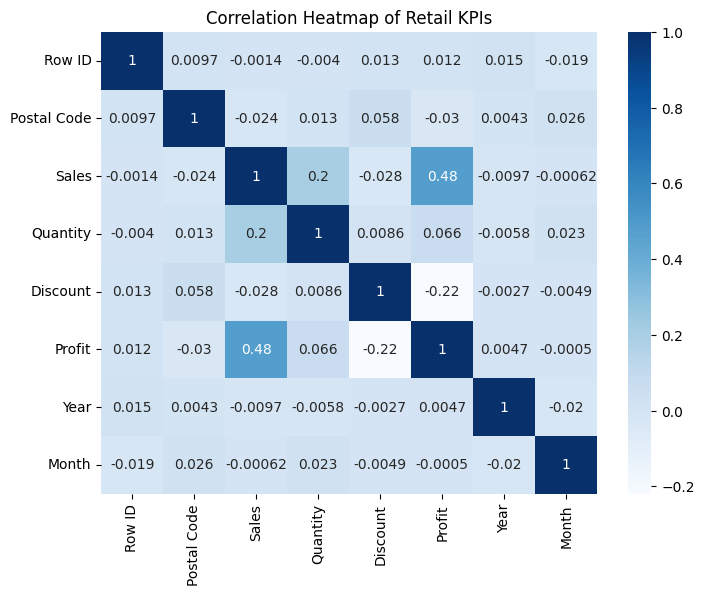

In [11]:
# STEP 8: Visualize Correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Retail KPIs')
plt.show()

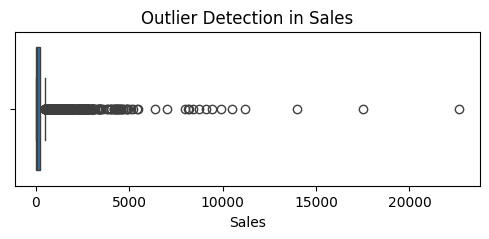

In [12]:
# STEP 9: Outlier Detection for Sales (if field exists)
if 'Sales' in df.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df['Sales'])
    plt.title('Outlier Detection in Sales')
    plt.show()

In [13]:
# STEP 10: Key Findings — Top Correlated Features with Sales
if 'Sales' in corr_matrix.columns:
    print('\n--- Features correlated with Sales ---')
    print(corr_matrix['Sales'].sort_values(ascending=False))


--- Features correlated with Sales ---
Sales          1.000000
Profit         0.479064
Quantity       0.200795
Month         -0.000625
Row ID        -0.001359
Year          -0.009679
Postal Code   -0.023854
Discount      -0.028190
Name: Sales, dtype: float64


In [14]:
# STEP 11: Save Cleaned Data (optional)
df.to_csv('/content/vaibhav_cleaned.csv', index=False)
print("\nCleaned file saved as 'vaibhav_cleaned.csv'. Download via left sidebar if needed.")


Cleaned file saved as 'vaibhav_cleaned.csv'. Download via left sidebar if needed.
